In [1]:
import os
os.chdir('..')
import matplotlib.pyplot as plt
import torch
from bcmout.Sphere import Sphere
S = Sphere(1)
b = S.random(100)
print(S)
print(b.shape)
print(S.belongs(b).shape)
print(torch.all(S.belongs(b)))

torch.Size([2, 100])
torch.Size([100])
tensor(True)


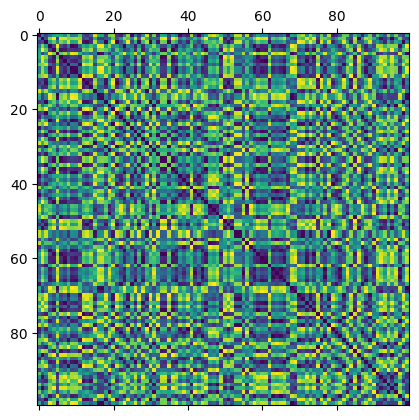

In [2]:
d=S.dissimilarity(b)
plt.matshow(d.numpy())
plt.show()

C:\Users\Dylan\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


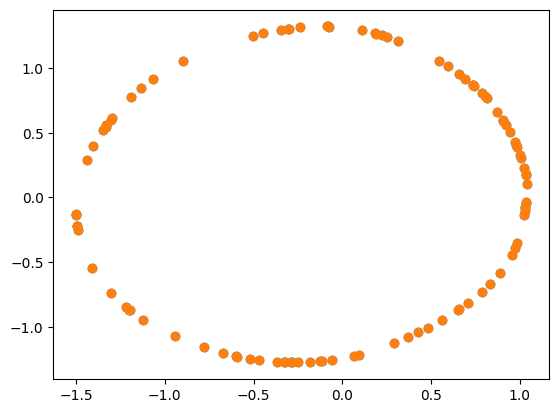

In [3]:
from sklearn.manifold import TSNE,MDS
X_embedded = MDS(n_components=2, dissimilarity='precomputed').fit_transform(((d+d.transpose(0,1))/2).numpy())
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.show()

In [4]:
from bcmout.ConeSpace import ConeOverM
COverS = ConeOverM(S,100)
print(COverS)
print(COverS._metric)
c=COverS.random(1000,10)
print(torch.all(COverS.belongs(c)))

tensor(True)


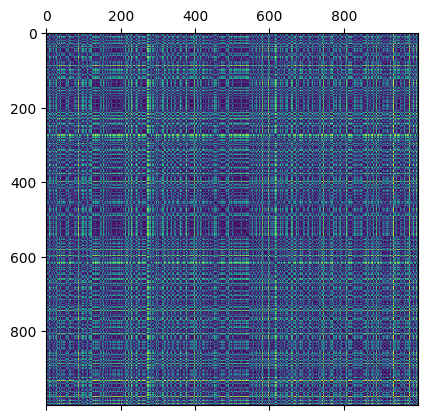

In [5]:
d=COverS.dissimilarity(c)
plt.matshow(d.numpy())
plt.show()
#print(d)

C:\Users\Dylan\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


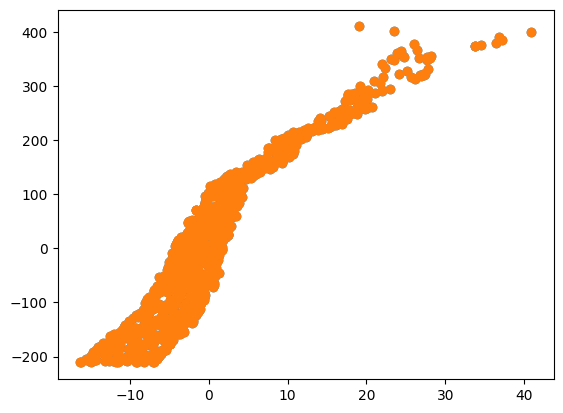

In [6]:

X_embedded = MDS(n_components=2, dissimilarity='precomputed').fit_transform(((d+d.transpose(0,1))/2).numpy())
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.show()

In [7]:
from bcmout.MeasureSpace import MeasureSpace
MonS = MeasureSpace(S,1,"WFR",True)
print(MonS)
print(MonS._metric)
e = MonS.random(1,5,1)
print(e)
print(torch.all(MonS.belongs(e)))

[tensor([[ 0.3509,  0.0826,  0.2114,  0.6739,  0.4826],
        [ 0.9521,  0.5981,  0.6475,  0.5898, -0.5169],
        [-0.3059,  0.8014, -0.7621,  0.8076, -0.8560]])]
tensor(True)


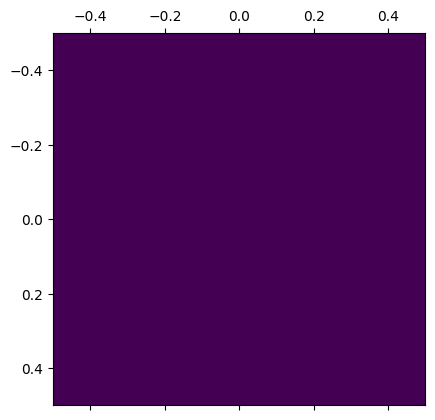

In [8]:
d = MonS.dissimilarity(e,max_steps=10000,eps=.00001)
plt.matshow(d.numpy())
plt.show()
#print(d)

C:\Users\Dylan\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\Dylan\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_mds.py:166: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\Dylan\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_mds.py:162: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress / dis) < eps:
C:\Users\Dylan\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_mds.py:166: RuntimeWarning: invalid value encountered in scalar divide
  old_stress = stress / dis
C:\Users\Dylan\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_mds.py:162: RuntimeWarning: invalid value encountered in scalar divide
  if (old_stress - stress /

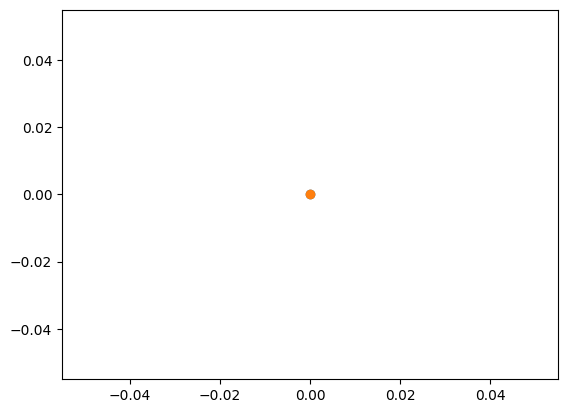

In [9]:
X_embedded = MDS(n_components=2, dissimilarity='precomputed').fit_transform(d.numpy())
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.show()